---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('fraud_data.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [20]:
def answer_one():
    return df['Class'].value_counts()[1] / len(df)


In [21]:
answer_one()

0.016410823768035772

In [ ]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [ ]:
from sklearn.dummy import DummyClassifier



In [22]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)

    dummy_accuracy = dummy_majority.score(X_test, y_test)
    dummy_recall = recall_score(y_test, y_dummy_predictions)   
  
    return dummy_accuracy, dummy_recall

In [23]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [24]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    classifier = SVC().fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = classifier.score(X_test, y_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, recall, precision

In [25]:
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [26]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    classifier = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    y_pred = (classifier.decision_function(X_test)) > -220
    return confusion_matrix(y_test, y_pred)


In [27]:
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [72]:
def answer_five():

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
    from matplotlib import pyplot as plt

    regression = LogisticRegression().fit(X_train, y_train) #LOGISTIC REGRESSION
    y_pred = regression.predict(X_test)

    #PRECISSION AND RECALL CURVE

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    #ROC CURVE
    y_pred = regression.decision_function(X_test)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    #PLOTTING-
    %matplotlib inline
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    fig = plt.figure(figsize=(15,4))

    #Precision-Recall
    ax1.axis(xmin=-0.01,xmax=1.01)
    ax1.axis(ymin=-0.01,ymax=1.01)
    ax1.plot(precision, recall, label='Precision-Recall Curve')
    ax1.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

    ax1.set_xlabel('Precision', fontsize=10)
    ax1.set_ylabel('Recall', fontsize=10)
    ax1.set_title('Precision-Recall Curve', fontsize=16)

    #LogReg ROC Curve
    ax2.axis(xmin=-0.01,xmax=1.01)
    ax2.axis(ymin=-0.01,ymax=1.01)
    ax2.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    ax2.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

    ax2.set_xlabel('False Positive Rate', fontsize=10)
    ax2.set_ylabel('True Positive Rate', fontsize=10)
    ax2.set_title('ROC curve', fontsize=16)
    #Looking at the precision recall curve, what is the recall when the 
    # precision is `0.75`?

    # ~0.84

    #Looking at the roc curve, what is the true positive rate when 
    # the false positive rate is `0.16`?

    # ~0.89

    return 0.84, 0.89

c:\Users\kmurgana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


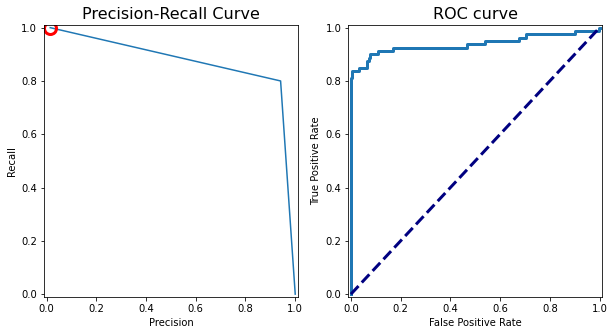

<Figure size 1080x288 with 0 Axes>

In [73]:
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [82]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    regression = LogisticRegression()

    dictionary = {'penalty':['l1', 'l2'],
                   'C':[0.01, 0.1, 1, 10, 100]}

    cv_regression = GridSearchCV(regression, param_grid=dictionary, scoring='recall')
    cv_regression.fit(X_train, y_train)
    results = cv_regression.cv_results_['mean_test_score']

    return results

c:\Users\kmurgana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kmurgana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

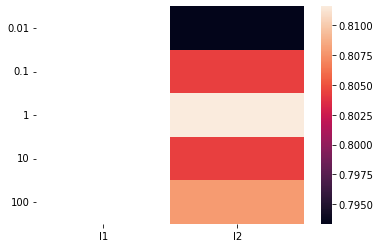

In [83]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())